### Visualizing tweets and the Logistic Regression model
<br> 

**Objectives**: Visualize and interpret the logistic regression model 
 
**Steps:** 
 
Plot tweets in a scatter plot using their positive and negative sums.
Plot the output of the logistic regression model in the same plot as a solid line

#### Import the required libraries

In [1]:
from os import getcwd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import twitter_samples

#### Load the NLTK sample dataset

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


#### Load the extracted features

In [3]:
data = pd.read_csv('logistic_features.csv')
data.head(5)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [8]:
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values

#### Load a pretrained Logistic Regression model

In [6]:
theta = [7e-08, 0.0005239, -0.00055517]

#### Plot the samples in a scatter plot

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.
 
If we ignore the bias term, we can plot each tweet in a cartesian plane, using positive_sum and negative_sum. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

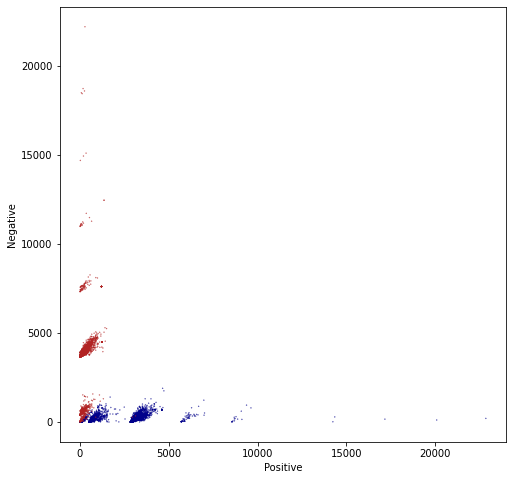

In [14]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['firebrick', 'darkblue']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

plt.show()

#### Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where
 
𝑧 = 𝜃 ∗ 𝑥 = 0.
 
To draw this line, we have to solve the above equation in terms of one of the independent variables.
 
𝑧 = 𝜃 ∗ 𝑥 = 0
 
𝑥=[1,𝑝𝑜𝑠,𝑛𝑒𝑔]
 
𝑧(𝜃,𝑥) = 𝜃0 + 𝜃1 ∗ 𝑝𝑜𝑠 + 𝜃2 ∗ 𝑛𝑒𝑔 = 0
 
𝑛𝑒𝑔 = (−𝜃0−𝜃1 ∗ 𝑝𝑜𝑠) / 𝜃2
 
The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations(neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model.
 
𝑑𝑖𝑟𝑒𝑐𝑡𝑖𝑜𝑛 = 𝑝𝑜𝑠 ∗ 𝜃2 / 𝜃1

In [15]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return pos * theta[2] / theta[1]

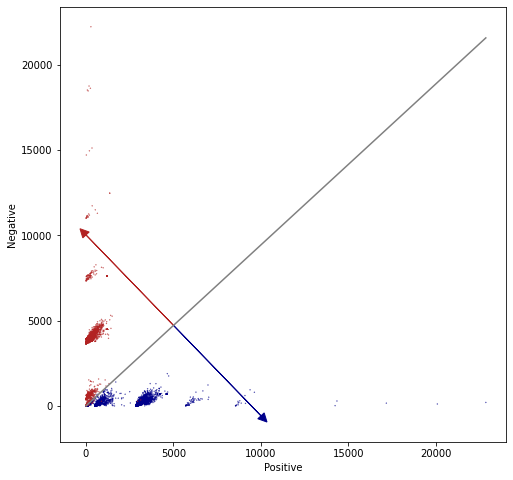

In [19]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['firebrick', 'darkblue']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0), neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), 
         head_width=500, head_length=500, fc='darkblue', ec='darkblue')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), 
         head_width=500, head_length=500, fc='firebrick', ec='firebrick')

plt.show()